In [4]:
# understanding datasets and dataloaders in torch
# dataset code should be decoupleed from our model training code for better readability and moddularity

# This is where DataLoaders and Datasets come in 
# Dataset stores the data samples with their corresponding targets
# Dataloaders wrap an iterable object around it to allow for batching and other deep learning specific functionality

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import matplotlib.pyplot as plt


In [2]:
training_data = FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
test_data = FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())

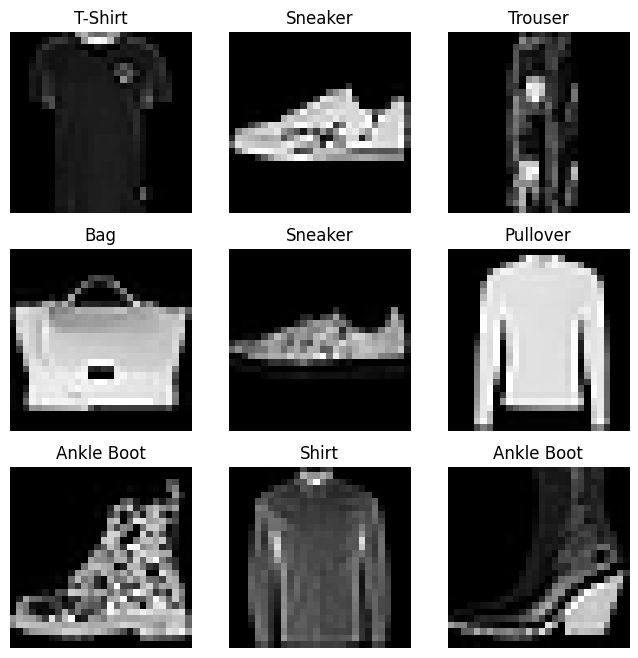

In [8]:
# define a label map, alternatively you could just use a list
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx][0], training_data[sample_idx][1]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [9]:
# Creating custom datasets for your own files
import os
import pandas as pd
from torchvision.io import read_image


In [ ]:
# 3 dunder methods must be implemented __init__, __len__ and __getitem__

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        # the images are not immediately read into memory, only the path and how to read them is stored
        self.img_labels =  pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        
        return (image, label)

In [10]:
# labels.csv (annotation file) would look like this

'''

tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9

'''

'\n\ntshirt1.jpg, 0\ntshirt2.jpg, 0\n......\nankleboot999.jpg, 9\n\n'

In [11]:
# preparing your data for dataloading
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [12]:
train_features, train_label = next(iter(train_dataloader))
print("Feature batch shape is , ", train_features.shape)
print("Label batch shape is , ", train_label.shape)

Feature batch shape is ,  torch.Size([64, 1, 28, 28])
Label batch shape is ,  torch.Size([64])


In [18]:
img = train_features[0].squeeze()

In [19]:
img.shape

torch.Size([28, 28])

In [16]:
label = train_label[0]

In [17]:
label.shape

torch.Size([])

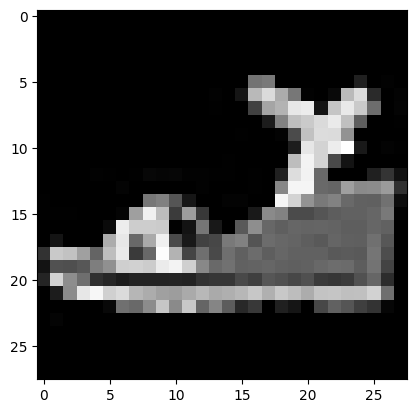

In [20]:
plt.imshow(img, cmap="gray")
plt.show()

In [22]:
print("Label : ", labels_map[label.item()])

Label :  Sandal
